# Задача по решению СЛАУ
## Вариант о)

## 1. Подготовка к решению задачи

In [236]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

# CONSTS
N = 100
a = np.float64(10.0)
b = np.float64(1.0/10.0)

Вид системы линейных уравнений  $Ax = b$
где $A$ - матрица системы, $b$ - столбец правой части

In [237]:
# заполнение матрицы А, вектора b

A = np.eye(N, dtype = np.float64)
A = A * a
for i in range(1, N):
    A[i, i - 1] = 1
    if i < 99:
        A[i - 1, i] = 1
    if i < 99:
        A[i - 1, i + 1] = b

B = np.arange(1, N + 1)



In [238]:
# определение эпсилон машинного для типа float64

i = 0
epsFloat = np.float64(1.0)
while (1 + epsFloat) != 1:
        epsFloat  = epsFloat / 2
        i += 1
print("Машинное эпсилон :", epsFloat)

# матрица абсолютных погрешностей А
deltaA = epsFloat * A

# столбец абсолютных погрешностей b
deltaB = epsFloat * B

epsB = np.linalg.norm(deltaB, ord = 2) / np.linalg.norm(B, ord = 2)
epsA = np.linalg.norm(deltaA, ord = 2) / np.linalg.norm(A, ord = 2)

print("epsilon A:", epsA, "\nepsilon B:", epsB)


Машинное эпсилон : 1.1102230246251565e-16
epsilon A: 1.1102230246251565e-16 
epsilon B: 1.1102230246251565e-16


## 2. Алгоритм Гаусса (*не реализован до конца*)

In [239]:
# программирование метода Гаусса
def Hauss(A, B):
    n = len(B)
    C = np.eye(n, dtype = np.float64)
    C = A.copy()
    D = np.arange(1, n + 1)
    D = B.copy()
    x = np.zeros(n)

    # прямой ход алгоритма Гаусса
    for i in range(n - 1):
        for j in range(i + 1, n):
            koef = (-1) * C[j,i] / C[i,i]
            for k in range(i, n):
                C[j, k] = C[j, k] + koef * C[i, k]
            D[j] = D[j] + D[i] * koef
    
    # Обратный ход алгоритма Гаусса
    for i in range(n - 1, -1, -1):
        x[i] = (D[i])
        for j in range(i + 1, n):
            x[i] = x[i] - C[i, j] * x[j]
        x[i] = x[i] / C[i,i]

    print(D == C.dot(x))
    
    return x

## 3. Расчет вычислительной погрешности для исходной системы и для систем с выбранной правой частью

In [240]:
# найдем значения правой части, которые отвечают максимальной и минимальной вычислительной погрешностям 

# собственные числа матрицы А
L, v = np.linalg.eigh(A.dot(A.T))
Li, vi = np.linalg.eigh(np.linalg.inv(A).dot(np.linalg.inv(A).T))

i = 0
while (L[i] != max(L) ):
    i += 1

# на Fi достигается (в теориии) максимальная погрешность вычисления решения
Fmax= A.dot(v[i])

i = 0
while (Li[i] != max(Li) ):
    i += 1

# на F достигается (в теории) минимальная погрешность вычисления решения 
Fmin = vi[i]

In [241]:
# нормы матриц
norm1 = np.linalg.norm(A, ord = 1)
norm2 = np.linalg.norm(A, ord = np.inf)
norm3 = np.linalg.norm(A, ord = 2)

print("Нормы матриц:", norm1, norm2, norm3)

# точное решение

# U = Hauss(A, B) - алгоритм Гаусса пока не работает
U = np.linalg.solve(A, B)
normU = np.linalg.norm(U, ord = 2)

# число обусловленности 
Mu1 = norm1 * np.linalg.norm(np.linalg.inv(A), ord = 1)
Mu2 = norm2 * np.linalg.norm(np.linalg.inv(A), ord = np.inf)
Mu3 = norm3 * np.linalg.norm(np.linalg.inv(A), ord = 2)
print("Число обусловленности матрицы А:", "\nпо норме 1 - " , Mu1, "\nпо норме 2 - ", Mu2, "\nпо норме 3 - " , Mu3)

# проверка условий теоремы
print("Проверка условий теоремы: ", (Mu3 * epsA < 1) )

# вычисление абсолютной погрешности решения
NormDeltaU = Mu3 / (1 - Mu3 * epsA ) * ( epsB + epsA )
print("Оценка относительной погрешности (по норме 3) полученного точного решения:", NormDeltaU)

# вычисление абсолютной погрешности решения, учитывая, что delta A примерно 0
NormDeltaU = Mu3 * epsB
print("Оценка относительной погрешности (по норме 3) полученного точного решения в пренебрежении погрешности delta А:", NormDeltaU)

Нормы матриц: 12.1 12.1 12.098823914668102
Число обусловленности матрицы А: 
по норме 1 -  1.4970992831504324 
по норме 2 -  1.5064472594732172 
по норме 3 -  1.4935358394602174
Проверка условий теоремы:  True
Оценка относительной погрешности (по норме 3) полученного точного решения: 3.31631575414319e-16
Оценка относительной погрешности (по норме 3) полученного точного решения в пренебрежении погрешности delta А: 1.6581578770715948e-16


In [242]:
# в качестве eps(f) {Ax = f} выбрано 2*epsFloat чтобы учесть машинную погрешность для элементов матрицы А
# проверка соответствия априорной погрешности (максимальной и минимальной) и реальной  погрешности вычислений

# Fmax 
Umax = np.linalg.solve(A, Fmax)
epsilon = np.linalg.norm(Umax - np.linalg.inv(A).dot(Fmax), ord = 2) / np.linalg.norm(Umax, ord = 2)

print("реальная вычислительная погрешность: ", epsilon, " теоретическая вычислительная погрешность: ", Mu3*2*epsFloat)

# Fmin
Umin = np.linalg.solve(A, Fmin)
epsilon = np.linalg.norm(Umin - np.linalg.inv(A).dot(Fmin), ord = 2) / np.linalg.norm(Umin, ord = 2)

print("реальная вычислительная погрешность: ", epsilon, " теоретическая вычислительная погрешность: ", 2*epsFloat/Mu3)

реальная вычислительная погрешность:  2.901143497215477e-16  теоретическая вычислительная погрешность:  3.3163157541431896e-16
реальная вычислительная погрешность:  2.1393882687213133e-16  теоретическая вычислительная погрешность:  1.486704229376116e-16


In [243]:
# проверка соответствия априорной погрешности (максимальной и минимальной) и реальной  погрешности вычислений
# при учете пункта 1.6 письменного отчета

# Fmin
Umin = np.linalg.solve(A, Fmin)
epsilon = np.linalg.norm(Umin - np.linalg.inv(A).dot(Fmin), ord = 2) / np.linalg.norm(Umin, ord = 2)

print("реальная вычислительная погрешность: ", epsilon, " теоретическая вычислительная погрешность: ", 2*epsFloat)

реальная вычислительная погрешность:  2.1393882687213133e-16  теоретическая вычислительная погрешность:  2.220446049250313e-16


## 4. Построение функций для вычисления последовательных приближений и различного рода критериев останова

In [244]:

# функция вычисления последовательного приближения
# fx = Rx + B
def approx (a, R, B, f):
    curr = np.zeros(len(a), dtype = np.float64)
    curr = a.copy()
    for i in range(len(curr)):
        if R[i,i] != 0:
            print ("Error in R matrix!\n")
            return a
        tmp = R.dot(curr)
        curr[i] = (B[i] + tmp[i]) / f[i]
    return curr

# функция вычисления k -го последовательного приближения
def approx_k (a, R, B, f, k):
    b = a.copy()
    for i in range(k):
        b = approx(b, R, B, f)
    return b 

# вычисление невязки по норме k
# r = f - Ax
def discrep (x, A, B, k):
    r = np.zeros(len(x), dtype = np.float64)
    r = B - A.dot(x)
    norm = np.linalg.norm(r, ord = k)
    return norm

# вычисление нормы (K) погрешности n-го приближения относительно точного решения
def EpsSolve (B, eps0, n, k):
    normB = np.linalg.norm(B, ord = k)
    normEps = np.linalg.norm(eps0, ord = k)
    norm = np.float64((normB ** n) / (1 - normB) * normEps )
    return np.abs(norm)

#вычисление нормы (K) погрешности n-го приближения относительно n-1 приближения
def EpsSubs (Xn, Xn1, k):
    Xn1 = Xn1 - Xn
    return np.linalg.norm(Xn1, ord = k)



In [245]:
# матрицы, необходимые для к=некоторых расчетов - они упрощают работу с вычислением погрешностей
R = (-1.0) * (A - a * np.eye(N, dtype = np.float64))
Temp = np.linalg.inv(np.tril(A, k = 0)).dot((A - np.tril(A, k = 0)))

# вычисление приближенного решения с разными критериями останова

x = np.zeros(len(B), dtype = np.float64)
f = np.full((len(B), 1), a, dtype = np.float64)

# по невязке, норма 3
# приближение (условие выхода из цикла) выбрано именно так, потому что разница по невязке достигает определенного значения, 
# сравнимого с epsFloat, но немного его превышающего и далее не становится меньше.
counter = 0
epsilon = 1
epsilon_new = 1
while ( epsilon_new != epsilon or counter == 0):
     epsilon = epsilon_new
     x = approx (x, R, B, f)
     epsilon_new = (discrep(x, A, B, 2) / np.linalg.norm(x, ord = 2))
     counter += 1

print ("Разница между приближенным и точным решением (по норме 3): ")
print ( "по невязке:", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

# по относительной погрешности, норма 3
x = np.zeros(len(B), dtype = np.float64)
counter = 0
eps0 = np.zeros(len(B), dtype = np.float64)
epsilon = 1
while ( epsilon >= epsFloat or counter == 0):
     if (counter == 0):
          eps0 = approx (x, R, B, f) - x
     x = approx (x, R, B, f)
     counter += 1
     epsilon = EpsSolve(Temp, eps0, counter, 2) / np.linalg.norm(x, ord = 2)

print("по разнице относительно точного решения:", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

# по погрешности соседних приближений, норма 3
x = np.zeros(len(B), dtype = np.float64)
counter = 0
epsilon = 1
while ( epsilon >= epsFloat or counter == 0):
     if np.linalg.norm(x, ord = 2) > 0 :
          epsilon = EpsSubs(approx(x, R, B, f), x, 2) / np.linalg.norm(x, ord = 2)
     x = approx (x, R, B, f)
     counter += 1
     
print("по разнице соседних приближений:", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

Разница между приближенным и точным решением (по норме 3): 
по невязке: 6.025453557005701e-15 достигнута за  19  итераций
по разнице относительно точного решения: 6.136367973050629e-15 достигнута за  17  итераций
по разнице соседних приближений: 6.025709257468674e-15 достигнута за  18  итераций


## 5. Построение графиков для сравнения скорости убывания ошибок

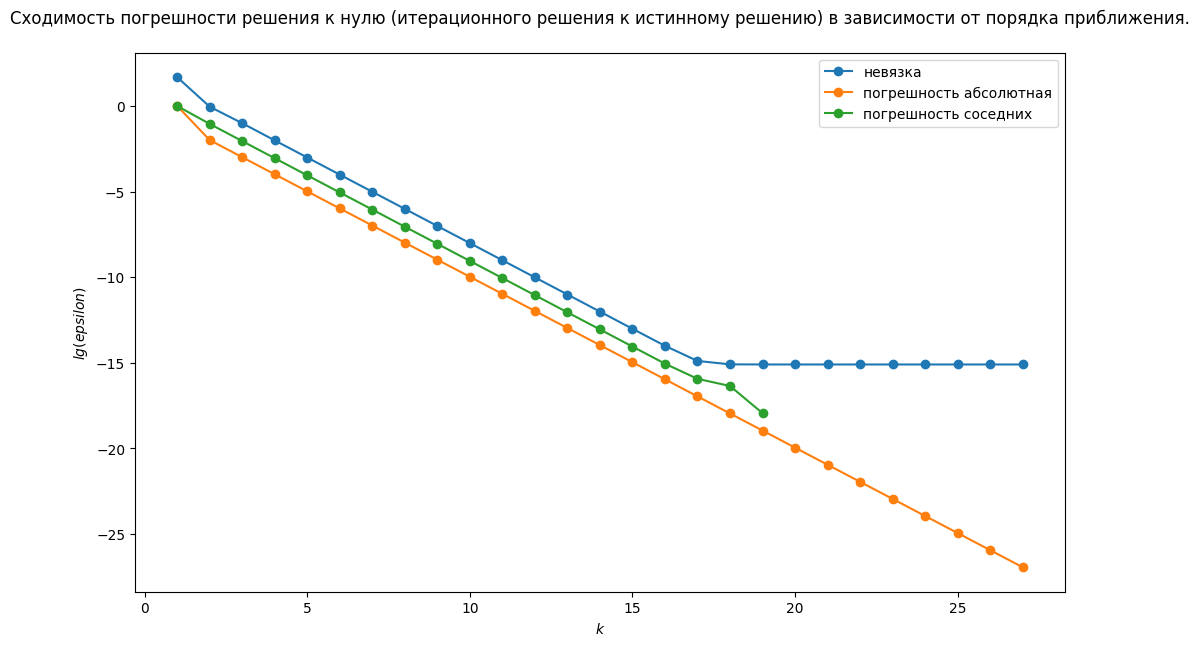

In [246]:
# построение графиков для анализа скорости убывания относительной погрешности

k = np.arange(1, 28)
x = np.zeros(N, dtype = np.float64) + 1

E1 = np.zeros(len(k))
E2 = np.zeros(len(k))
E3 = np.zeros(len(k))

for i in range(len(k)):
    E1[i] = np.log10(discrep(x, A, B, 2) / np.linalg.norm(x, ord = 2))
    x1 = approx(x, R, B, f)
    if i == 0:
        eps0 = x1 - x
    if (i > 0):
        E2[i] = np.log10(EpsSolve(Temp, eps0, k[i], 2)/ np.linalg.norm(x1, ord = 2))
        if (x1 != x).any():
            E3[i] = np.log10(EpsSubs(x1, x, 2)/ np.linalg.norm(x1, ord = 2))
        else:
            E3[i] = (-1)*np.inf
    x = x1

# построение графиков 

plt.figure(figsize=[12,7])
plt.plot(k, E1, 'o-', label = "невязка")
plt.plot(k, E2, 'o-', label = "погрешность абсолютная")
plt.plot(k, E3, 'o-', label = "погрешность соседних")

plt.xlabel("$k$")
plt.ylabel("$lg(epsilon)$")
plt.title("Сходимость погрешности решения к нулю (итерационного решения к истинному решению) в зависимости от порядка приближения.\n")

plt.legend()
plt.show()

### Анализ графиков

* *Невязка* 

    Мы видим, что до некоторых пор график линейно убывает -- это отображает характер скорости уменьшения погрешности -- как геометрическая прогрессия. Затем относительная погрешность невязки по отношению к решению перестает уменьшаться. Как можно заметить, это происходит при достижении величин погрешности порядка $ \epsilon _{маш} $. 

* *Погрешность относительно точного решения*

    Данная погрешность монотонно убывает (в логарифмическом масштабе) - это объясняется тем, что данная погрешность вычисляется по формуле, не учитывающей разницу между последовательными приближениями, а основывается только на номере приближения и разности первого и нулевого приближений.

* *Погрешность соседних решений*

    Данный график построен только до значений $k = 18$ так как в данном случае вычисляется погрешность по разности двух последовательных приближений. И по достижении $ \epsilon _{маш} $ данная ошибка обращается в 0 - логарифм обращается в $ - \infty$.